# Zirconium Properties Database



## Table of Contents
- [Abstract](#abstract)
- [Introduction](#introduction)
- [Section 1: Manufacturing & Heat Treatment](#section-1)
  - [1.1. Composition](#composition)
  - [1.2. Heat Treatment](#heat_treatment)
  - [1.3. Microstructure](#microstructure)
  - [1.4. Product Forms](#forms)
- [Section 2: Thermo-physical Properties](#section-2)
  - [2.1. Density](#density)
  - [2.2. Thermal Diffusivity](#diffusivity)
  - [2.3. Specific Heat](#cp)
  - [2.4. Thermal Conductivity](#conductivity)
  - [2.5. Coefficient of Thermal Expansion](#expansion)
  - [2.6. Thermal Emissivity](#emissivity)
  - [2.7. Electrical Resistivity](#resistivity)
  - [2.8. Magnetic Properties](#magnetic)
  - [2.9. Elastic Properties](#elastic)
- [Section 3: Mechanical Properties](#mechanical)

<a id="abstract"></a>
<h2 style="text-align: center;">Abstract</h2>
<p style="text-align: justify;">
We present a comprehensive database for .
</p>

<a id="introduction"></a>
<h2>Introduction</h2>

<a id="section-1"></a>
<h2>Section 1: Manufacturing & Heat Treatment</h2>
<a id="composition"></a>
<h3> 1.1. Composition</h3>

<a id="product"></a>
<h3> 1.4. Product Forms</h3>

<a id="section-2"></a>
<h2>Section 2: Thermophysical Properties</h2>

In [8]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/path/to/Utilities')

from Utilities.models_2_0 import *
from Utilities.plots_2_0 import *


excel_filename = 'Zirconium/OSU_ZR_creep_data_plots.xlsx'
material_name = "Zirconium"


<a id=cp></a>
<h3>2.13. Creep</h3m> 

,timesec,voltV,engstrain,truestrain,notes
0,0.000000,5.000,0.000000,0.000000,68
1,4.400000,4.990,0.000333,0.000333,68
2,8.800000,4.770,0.007667,0.007637,68
3,13.200000,4.750,0.008333,0.008299,69
4,17.583333,4.750,0.008333,0.008299,68
...,...,...,...,...,...
215,217132.216667,2.195,0.093500,0.089384,69
216,218932.183333,2.195,0.093500,0.089384,69
217,220732.183333,2.194,0.093533,0.089414,69
218,222532.166667,2.196,0.093467,0.089353,69


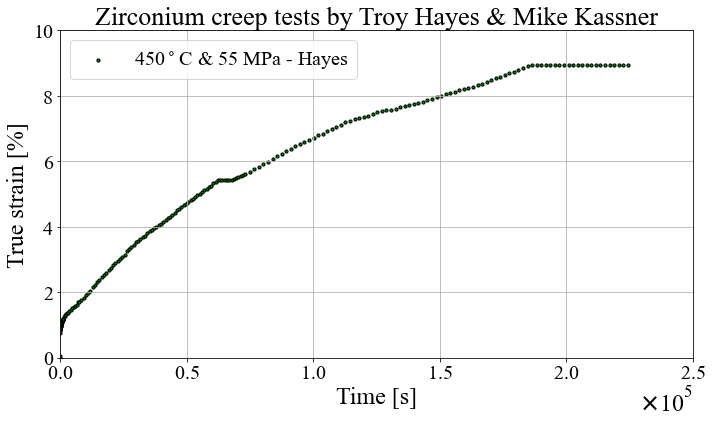

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import ScalarFormatter

# Load your data (assuming `load_data` returns the DataFrame in `df`)
material_property = "ZR-COAT1"
var_names, variables, df = load_data(excel_filename, material_property, header_rows_list=[1], num_data_rows=220)

# Plot configuration
legend_size = 6
m_size = 60
x_label = 'Time [s]'
y_label = r'True strain [%]'
x_lim = [0, 2.5e5]
y_lim = [0, 10]
data_labels = ['450$^\circ$C & 55 MPa - Hayes']
font_size = 24
legend_loc = 'best'
legend_size = 20

# Set the global font to Times Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']  # or just 'Times'

# Extract column headings to verify column names
headings = df.columns
x_data = df['timesec']
y_data = 100 * df['truestrain']

# Plotting
plt.figure(figsize=(10, 6))
#plt.plot(x_data, y_data, label=data_labels[0], color='blue', linestyle='-', linewidth=3)
plt.scatter(x_data, y_data, label=data_labels[0], color='green', s=10, edgecolor='black')

# Customize the axes labels and title
plt.xlabel(x_label, fontsize=font_size)
plt.ylabel(y_label, fontsize=font_size)
plt.xlim(x_lim)
plt.ylim(y_lim)
plt.title(f'Zirconium creep tests by Troy Hayes & Mike Kassner', fontsize=font_size + 2)

# Customize tick parameters (tick size)
plt.tick_params(axis='both', which='major', labelsize=font_size - 4)  # control tick size
plt.tick_params(axis='both', which='minor', labelsize=font_size - 6)

# Display x-axis in scientific notation
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))

# Optionally, you can customize how the scientific notation appears by using a ScalarFormatter
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

# Increase the size of the multiplier (10^n) on the x-axis
plt.gca().xaxis.get_offset_text().set_fontsize(font_size)  # Set the multiplier font size

# Customize the legend
plt.legend(loc=legend_loc, fontsize=legend_size)

# Add grid and ensure tight layout
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


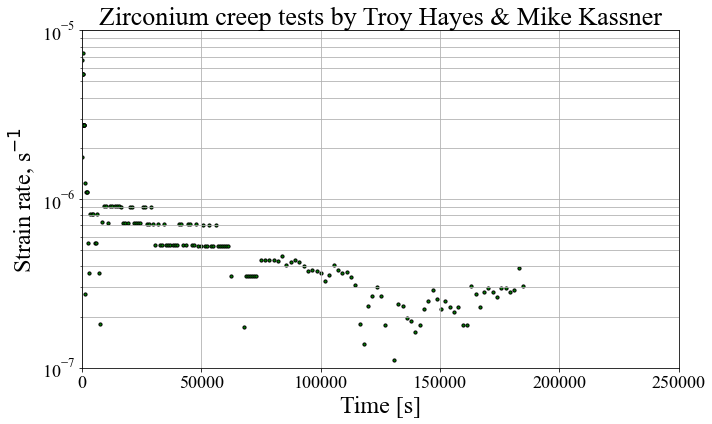

In [11]:

# Calculate the derivative of truestrain with respect to timesec
df['strain_rate'] = np.gradient(df['truestrain'], df['timesec'])

# Suppress negative values by filtering the DataFrame
df_filtered = df[df['strain_rate'] > 0]

# Plotting
plt.figure(figsize=(10, 6))
#plt.plot(df_filtered['timesec'], df_filtered['strain_rate'], label='strain rate', color='green', linestyle='-', linewidth=3)
# Use plt.scatter for just the data points
plt.scatter(df_filtered['timesec'], df_filtered['strain_rate'], label='strain rate', color='green', s=10, edgecolor='black')

# Customize the axes labels and title
plt.xlabel('Time [s]', fontsize=24)
plt.ylabel('Strain rate, s$^{-1}$', fontsize=24)
plt.xlim([df_filtered['timesec'].min(), df_filtered['timesec'].max()])
x_lim = [0, 2.5e5]
y_lim = [1e-7, 1e-5]
plt.xlim(x_lim)
plt.ylim(y_lim)
plt.title(f'Zirconium creep tests by Troy Hayes & Mike Kassner', fontsize=font_size + 2)

# Set log scale for y-axis
plt.yscale('log')
#plt.xscale('log')

# Customize tick parameters
plt.tick_params(axis='both', which='major', labelsize=18)

# Add grid and ensure tight layout
plt.grid(True, which='both', axis='both')
plt.tight_layout()

# Show plot
plt.show()
